In [15]:
#1st Problem: ID 1223239758
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from torch.autograd import Variable

#Feeding the given data(in problem) as some variables
x1_info = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] 
p_info = [28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5]
p_satw = 10.0**(8.07131-1730.63/(20.0+233.426))
p_satd = 10.0**(7.43155-1554.679/(20.0+240.337))

def loss(a): #defining the loss function
    total_loss= 0.0
    for i in range (11):
        x1 = x1_info[i]
        p= p_info[i]
        x2= 1-x1
        p_norm = x1*p_satw*t.exp(a[0]*(a[1]*(x2)/(a[0]*x1+a[1]*(x2)))**2) + (x2)*p_satd*t.exp(a[1]*(a[0]*x1/(a[0]*x1+a[1]*(x2)))**2)
        total_loss = total_loss + (p_norm-p)**2
    return total_loss #returning the defined loss value 

alpha = 1 #giving the error value as aplha
A= Variable(t.tensor ([1.0, 1.0]), requires_grad=True)


while alpha >= 0.05:
        loss(A).backward()
        alpha = t.linalg.norm(A.grad)
        X=.2
        while loss(A-X*A.grad)>loss(A):
            X=.5*X
        with t.no_grad():
            A-= X*A.grad
            A.grad.zero_()
print ('Estimated A12 and A21:',A)
print ('\n')
print ('Objective Value:',loss(A))
print ('\n')
from math import exp

for i in range (11) :
    x1 = x1_info[i]
    x2= 1-x1
    p_Norm = x1*p_satw*exp(A[0]*(A[1]*(x2)/(A[0]*x1+A[1]*(x2)))**2) + (x2)*p_satd*exp(A[1]*(A[0]*x1/(A[0]*x1+A[1]*(x2)))**2)
    print ('calculated value', round(p_Norm,1))
    
print ('\n')
print('Given Values of p',p_info)
print ('\n')
print('By camparing these two Calculated values and given values, the output: Calculated data is close to the given values of data')






Estimated A12 and A21: tensor([1.9584, 1.6893], requires_grad=True)


Objective Value: tensor(0.6702, grad_fn=<AddBackward0>)


calculated value 28.8
calculated value 34.6
calculated value 36.5
calculated value 36.9
calculated value 36.9
calculated value 36.8
calculated value 36.4
calculated value 35.4
calculated value 32.9
calculated value 27.7
calculated value 17.5


Given Values of p [28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]


By camparing these two Calculated values and given values, the output: Calculated data is close to the given values of data


C:\Users\pavan\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
C:\Users\pavan\anaconda3\lib\site-packages\sklearn\gaussian_process\_gpr.py:509: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pre

Graph for interations coverage and taking least square from it
[[ 1.80287881 -0.20231552]
 [-2.0428108   1.52136647]
 [ 2.55653896 -1.16830242]
 ...
 [-2.62106098  0.52604993]
 [-2.79524612 -1.41419719]
 [ 2.23593406 -0.34891857]]
[ 1.74002285e+00  1.34084088e+01  2.85081016e+01  1.21944343e+01
  1.72104482e+01  2.83947076e+01  8.08452637e+01  1.02294140e+02
  1.12159879e+02  1.69883931e+01  4.05488130e+00  2.09100140e+01
  4.57416342e+00  6.61031496e+00  4.04161108e+00  4.08251591e+01
  2.50648684e+01  8.67804232e-01  2.28570451e+00  2.25573533e+00
 -1.41333133e-01  2.40291136e+00 -4.80726110e-02  1.04790136e+01
 -3.99526891e-02  1.15219704e+00  5.77861797e+01  1.83200805e+01
  9.19337215e+01  8.89554181e+00  9.20954045e+00  2.73516233e+00
  6.91364792e+00 -7.62392717e-01  3.82460911e+00  3.95153409e+00
  9.47315247e+01  2.51183844e+00  1.36285423e+00  2.56188981e+01
  1.50900000e+02  2.31219822e+01  1.94089075e+00  3.27637345e+01
  1.81947415e+00  4.36530806e+01  6.74603183e+01  1.56

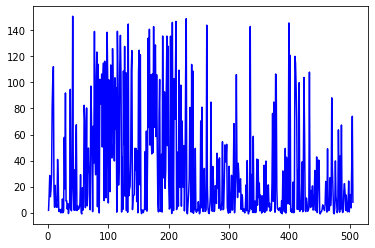

In [17]:
#2nd Problem: 1223239758
#Scratch code from thuijskens/bayesian-optimization code

""" gp.py
Bayesian optimisation of loss functions.
"""

import numpy as np
import sklearn.gaussian_process as gp
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.optimize import minimize

def expected_improvement(x, gaussian_process, evaluated_loss, greater_is_better=False, n_params=1):
    """ expected_improvement
    Expected improvement acquisition function.
    Arguments:
    ----------
        x: array-like, shape = [n_samples, n_hyperparams]
            The point for which the expected improvement needs to be computed.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: Numpy array.
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        n_params: int.
            Dimension of the hyperparameter space.
    """

    x_to_predict = x.reshape(-1, n_params)

    mu, sigma = gaussian_process.predict(x_to_predict, return_std=True)

    if greater_is_better:
        loss_optimum = np.max(evaluated_loss)
    else:
        loss_optimum = np.min(evaluated_loss)

    scaling_factor = (-1) ** (not greater_is_better)

    # In case sigma equals zero
    with np.errstate(divide='ignore'):
        Z = scaling_factor * (mu - loss_optimum) / sigma
        expected_improvement = scaling_factor * (mu - loss_optimum) * norm.cdf(Z) + sigma * norm.pdf(Z)
        expected_improvement[sigma == 0.0] == 0.0

    return -1 * expected_improvement


def sample_next_hyperparameter(acquisition_func, gaussian_process, evaluated_loss, greater_is_better=False,
                               bounds=(0, 10), n_restarts=25):
    """ sample_next_hyperparameter
    Proposes the next hyperparameter to sample the loss function for.
    Arguments:
    ----------
        acquisition_func: function.
            Acquisition function to optimise.
        gaussian_process: GaussianProcessRegressor object.
            Gaussian process trained on previously evaluated hyperparameters.
        evaluated_loss: array-like, shape = [n_obs,]
            Numpy array that contains the values off the loss function for the previously
            evaluated hyperparameters.
        greater_is_better: Boolean.
            Boolean flag that indicates whether the loss function is to be maximised or minimised.
        bounds: Tuple.
            Bounds for the L-BFGS optimiser.
        n_restarts: integer.
            Number of times to run the minimiser with different starting points.
    """
    best_x = None
    best_acquisition_value = 1
    n_params = bounds.shape[0]

    for starting_point in np.random.uniform(bounds[:, 0], bounds[:, 1], size=(n_restarts, n_params)):

        res = minimize(fun=acquisition_func,
                       x0=starting_point.reshape(1, -1),
                       bounds=bounds,
                       method='L-BFGS-B',
                       args=(gaussian_process, evaluated_loss, greater_is_better, n_params))

        if res.fun < best_acquisition_value:
            best_acquisition_value = res.fun
            best_x = res.x

    return best_x


def bayesian_optimisation(n_iters, sample_loss, bounds, x0=None, n_pre_samples=5,
                          gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7):
    """ bayesian_optimisation
    Uses Gaussian Processes to optimise the loss function `sample_loss`.
    Arguments:
    ----------
        n_iters: integer.
            Number of iterations to run the search algorithm.
        sample_loss: function.
            Function to be optimised.
        bounds: array-like, shape = [n_params, 2].
            Lower and upper bounds on the parameters of the function `sample_loss`.
        x0: array-like, shape = [n_pre_samples, n_params].
            Array of initial points to sample the loss function for. If None, randomly
            samples from the loss function.
        n_pre_samples: integer.
            If x0 is None, samples `n_pre_samples` initial points from the loss function.
        gp_params: dictionary.
            Dictionary of parameters to pass on to the underlying Gaussian Process.
        random_search: integer.
            Flag that indicates whether to perform random search or L-BFGS-B optimisation
            over the acquisition function.
        alpha: double.
            Variance of the error term of the GP.
        epsilon: double.
            Precision tolerance for floats.
    """

    x_list = []
    y_list = []

    n_params = bounds.shape[0]

    if x0 is None:
        for params in np.random.uniform(bounds[:, 0], bounds[:, 1], (n_pre_samples, bounds.shape[0])):
            x_list.append(params)
            y_list.append(sample_loss(params))
    else:
        for params in x0:
            x_list.append(params)
            y_list.append(sample_loss(params))

    xp = np.array(x_list)
    yp = np.array(y_list)

    # Create the GP
    if gp_params is not None:
        model = gp.GaussianProcessRegressor(**gp_params)
    else:
        kernel = gp.kernels.Matern()
        model = gp.GaussianProcessRegressor(kernel=kernel,
                                            alpha=alpha,
                                            n_restarts_optimizer=10,
                                            normalize_y=True)

    for n in range(n_iters):

        model.fit(xp, yp)

        # Sample next hyperparameter
        if random_search:
            x_random = np.random.uniform(bounds[:, 0], bounds[:, 1], size=(random_search, n_params))
            ei = -1 * expected_improvement(x_random, model, yp, greater_is_better=True, n_params=n_params)
            next_sample = x_random[np.argmax(ei), :]
        else:
            next_sample = sample_next_hyperparameter(expected_improvement, model, yp, greater_is_better=True, bounds=bounds, n_restarts=100)

        # Duplicates will break the GP. In case of a duplicate, we will randomly sample a next query point.
        if np.any(np.abs(next_sample - xp) <= epsilon):
            next_sample = np.random.uniform(bounds[:, 0], bounds[:, 1], bounds.shape[0])

        # Sample loss for new set of parameters
        cv_score = sample_loss(next_sample)

        # Update lists
        x_list.append(next_sample)
        y_list.append(cv_score)

        # Update xp and yp
        xp = np.array(x_list)
        yp = np.array(y_list)

    return xp, yp

m = 500 #No of iterations
nPreSamples = 5 #sample size

Eqn = lambda x: (4-2.1*x[0]**2+((x[0]**4)/3))*x[0]**2+x[0]*x[1]+(-4+4*(x[1]**2))*(x[1]**2) #given equation 
bounds = np.array([[-3, 3],[-2,2]]) #Boundary values
bp1, bp2 = bayesian_optimisation(m, Eqn, bounds, x0=None, n_pre_samples=5, gp_params=None, random_search=False, alpha=1e-5, epsilon=1e-7)

plt.plot(np.linspace(1,(m+nPreSamples),(m+nPreSamples)),bp2, color='blue') #plotting the graph
plt.show
print("Graph for interations coverage and taking least square from it")
print(bp1)
print(bp2)
print('Final value of X1 and X2 \t', bp1[500])
print('Minimized Value \t', bp2[500])
